<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_AccClust_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Clusters $\times$ Classes

Em um conjunto de dados rotulados, não existe nenhuma obrigação da clusterização levar aos mesmos grupos formados pelas classes. A semelhança ou aderência, entretanto, pode ser útil em muitos casos. O percentual de acertos entre os agrupamentos verdadeiros e os obtidos pela clusterização, é conhecida como *Taxa de Classificação Correta* (Correct Classification Rate, CCR) ou **Acurácia de Clusterização**.

Alguns cuidados entretanto devem ser tomados. Acompanhe aqui o exemplo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder

iris['species_code'] = LabelEncoder().fit_transform(iris.species)
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species,species_code
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

X = iris.drop(columns=['species','species_code'])

kmeans = KMeans(n_clusters=3, random_state=1,n_init="auto").fit(X)
iris['kmeans'] = kmeans.labels_

hclust = AgglomerativeClustering(n_clusters=3).fit(X)
iris['hclust'] = hclust.labels_

iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species,species_code,kmeans,hclust
0,5.1,3.5,1.4,0.2,setosa,0,0,1
1,4.9,3.0,1.4,0.2,setosa,0,0,1
2,4.7,3.2,1.3,0.2,setosa,0,0,1
3,4.6,3.1,1.5,0.2,setosa,0,0,1
4,5.0,3.6,1.4,0.2,setosa,0,0,1


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(iris['species_code'],iris['kmeans']))
print(accuracy_score(iris['species_code'],iris['kmeans']))

[[50  0  0]
 [ 0  3 47]
 [ 0 36 14]]
0.44666666666666666


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(iris['species_code'],iris['hclust']))
print(accuracy_score(iris['species_code'],iris['hclust']))

[[ 0 50  0]
 [49  0  1]
 [15  0 35]]
0.23333333333333334


## A clusterização `Kmeans` apresenta mesmo acuracidade de clusterização tão superior à da clusterização Hierárquica?  

In [ ]:
#@markdown Click para ver a resposta
iris['hclust'] = iris['hclust'].replace(1,-1)
iris['hclust'] = iris['hclust'].replace(0,1)
iris['hclust'] = iris['hclust'].replace(-1,0)

print(confusion_matrix(iris['species_code'],iris['hclust']))
print(accuracy_score(iris['species_code'],iris['hclust']))

[[50  0  0]
 [ 0 49  1]
 [ 0 15 35]]
0.8933333333333333


# Exercício: Sua vez...

Repita agora os procedimentos para o conjunto de dados `iris_IMT`.

Q1. Qual a acuracidade de clusterização obtida para o Kmeans e Hclust?

Q2. Para a Clusterização Hierárquica a alteração da ordem dos elementos da matriz de confusão permite obter uma acuracidade de clusterização maior?



In [ ]:
#@markdown Tente agora com o `iris_IMT`
iris_IMT = sns.load_dataset('iris')
iris_IMT.head()

from sklearn import datasets
noisy_circles = datasets.make_circles(n_samples=50, factor=0.99, noise=0.03, random_state=1)

iris_IMT.iloc[0:50,0] = noisy_circles[0][:,0]*1
iris_IMT.iloc[0:50,1] = noisy_circles[0][:,1]*1
iris_IMT.iloc[50:100,0] = noisy_circles[0][:,0]*5
iris_IMT.iloc[50:100,1] = noisy_circles[0][:,1]*5
iris_IMT.iloc[100:150,0] = noisy_circles[0][:,0]*10
iris_IMT.iloc[100:150,1] = noisy_circles[0][:,1]*10

iris_IMT['petal_length'] = np.random.normal(0, 2, 150)
iris_IMT['petal_width'] = np.random.normal(0, 2, 150)

In [ ]:
iris_IMT.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.918691,0.504667,0.216391,1.182693,setosa
1,-0.840073,0.570490,-1.772757,-1.590950,setosa
2,-0.823236,-0.595021,0.200683,-2.980192,setosa
3,-0.994987,-0.082638,1.453138,1.508837,setosa
4,0.879258,0.470670,1.727248,-0.187594,setosa


In [ ]:
# seu código

# DBSCAN

Agora, pesquise e aplique algoritmo de clusterização DBSCAN.

> Ester, Martin; Kriegel, Hans-Peter; Sander, Jörg; Xu, Xiaowei (1996). Simoudis, Evangelos; Han, Jiawei; Fayyad, Usama M. (eds.). [**A density-based algorithm for discovering clusters in large spatial databases with noise**](https://cdn.aaai.org/KDD/1996/KDD96-037.pdf). Proceedings of the Second International Conference on Knowledge Discovery and Data Mining (KDD-96). AAAI Press. pp. 226–231. CiteSeerX 10.1.1.121.9220. ISBN 1-57735-004-9.

> Aqui um resumo do [paper](https://www.datanovia.com/en/lessons/dbscan-density-based-clustering-essentials/)

<br>

![imagem](https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/005-advanced-clustering/images/dbscan-principle.png)

Ao aplicar o algoritmo do `scikit-learn` considere:

1. `min_samples=3`
2. A distância máxima entre duas amostras para que sejam consideradas uma vizinha da outra, no range de $[2, 5]$, a intervalos de $0.5$, isto é $2, 2.5, 3, 3.5, ... 5$.
3. Você está buscando 3 agrupamentos, considere os grupos 0 e 1, e todos os demais como o grupo 2.

Q3. O DBSCAN é um algoritmo determinístico?

Q4. O DBSCAN permite fornecer o número de clusters desejado assim como ocorre no kmeans e hclust?

Q5. Qual o melhor valor de distância máxima entre duas amostras para a obtenção de 3 agrupamentos (não esqueça de considerar o item 3!)?

Q6. Qual a acuracidade de clusterização obtida com o melhor valor de distância empregado?

In [ ]:
# seu código

# DBSCAN melhor? (**RESOLVIDO**)

Entenda aqui por que nesse conjunto o DBSCAN funciona melhor substituindo o dataframe `iris` pelo seu novo conjunto `iris_IMT`.

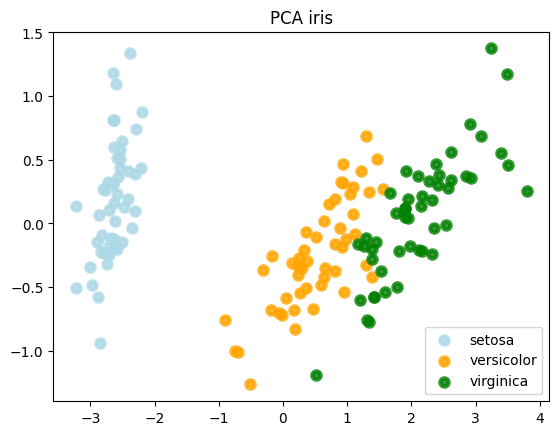

In [ ]:
from sklearn.decomposition import PCA

df = iris

pca = PCA(n_components=2)
X_r = pca.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = df.species

colors = ['lightblue', 'orange', 'green']
for color, s, target_name in zip(colors, ['setosa','versicolor','virginica'], df.species.unique()):
    plt.scatter(X_r[y == s, 0], X_r[y == s, 1], color=color, alpha=.8, lw=3, label=target_name)

plt.legend(loc='best', scatterpoints=1)
plt.title('PCA iris')

plt.show()
